In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.shape

(200, 4)

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


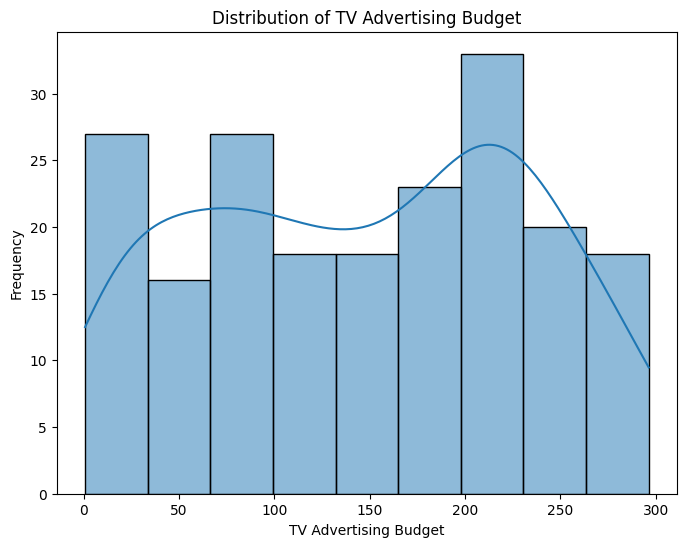

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(df['TV'], kde=True)
plt.title('Distribution of TV Advertising Budget')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Frequency')
plt.show()

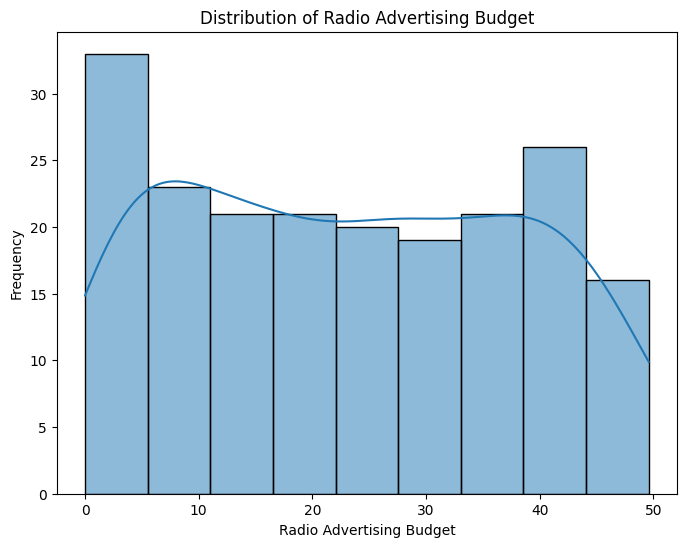

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Radio'], kde=True)
plt.title('Distribution of Radio Advertising Budget')
plt.xlabel('Radio Advertising Budget')
plt.ylabel('Frequency')
plt.show()

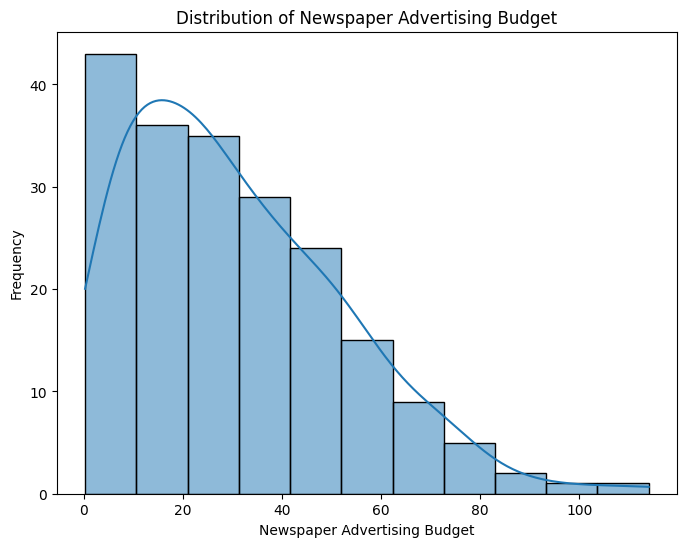

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Newspaper'], kde=True)
plt.title('Distribution of Newspaper Advertising Budget')
plt.xlabel('Newspaper Advertising Budget')
plt.ylabel('Frequency')
plt.show()

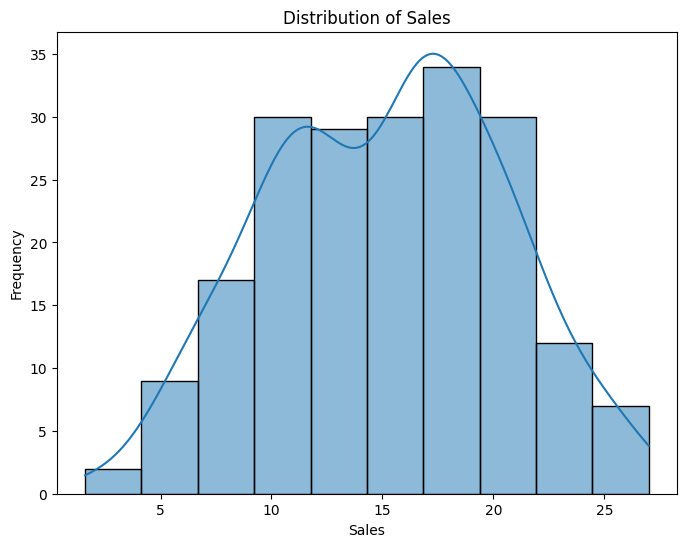

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

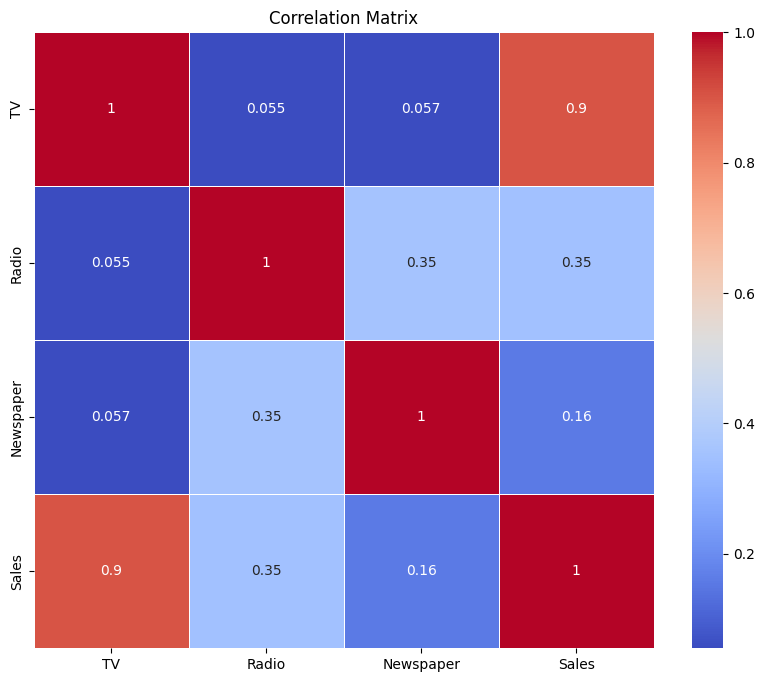

In [12]:
# Correlation matrix
correlation_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


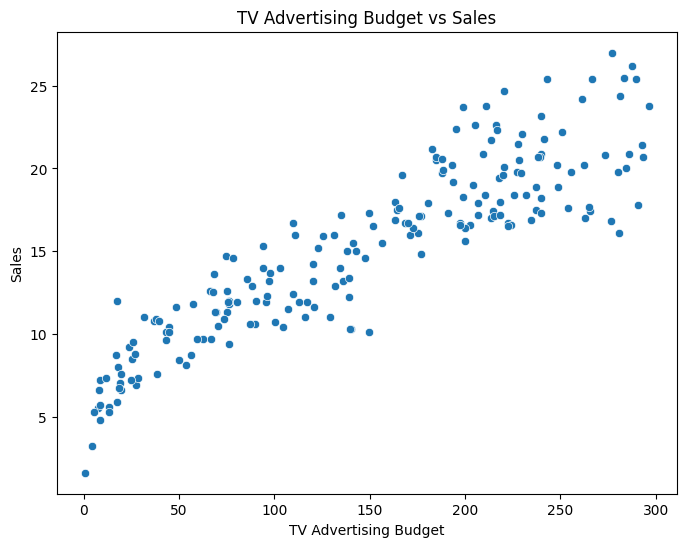

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.title('TV Advertising Budget vs Sales')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.show()

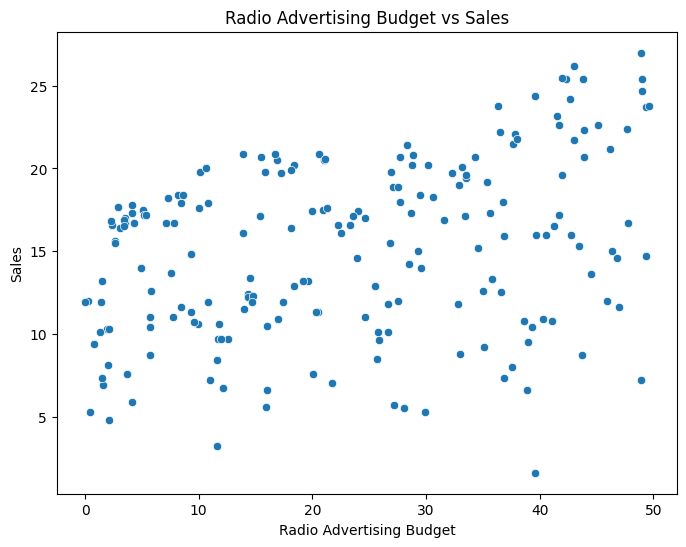

In [14]:
# Scatter plot of Radio vs Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Radio', y='Sales')
plt.title('Radio Advertising Budget vs Sales')
plt.xlabel('Radio Advertising Budget')
plt.ylabel('Sales')
plt.show()

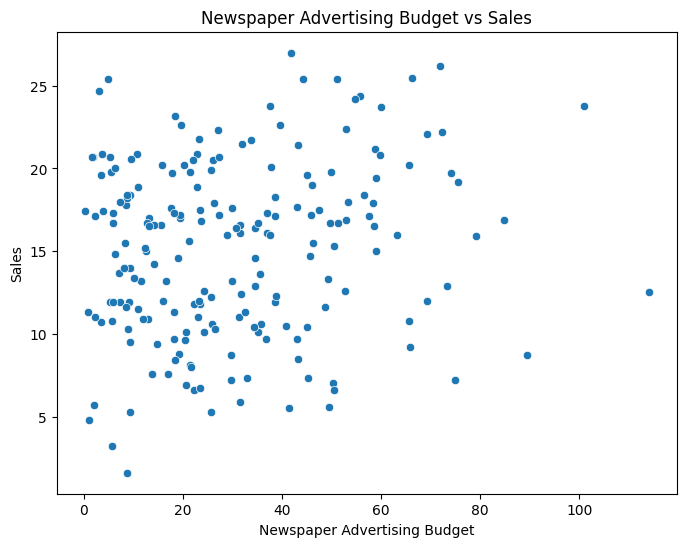

In [15]:
# Scatter plot of Newspaper vs Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Newspaper', y='Sales')
plt.title('Newspaper Advertising Budget vs Sales')
plt.xlabel('Newspaper Advertising Budget')
plt.ylabel('Sales')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
model.intercept_

4.714126402214127

In [23]:
model.coef_

array([0.05450927, 0.10094536, 0.00433665])

In [24]:
y_pred = model.predict(X_test)

In [25]:
y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [26]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error


In [27]:
mean_absolute_error(y_test,y_pred)

1.2748262109549338

In [28]:
mean_absolute_percentage_error(y_test,y_pred)

0.10880888971170635

In [29]:
mean_squared_error(y_test,y_pred)

2.9077569102710896

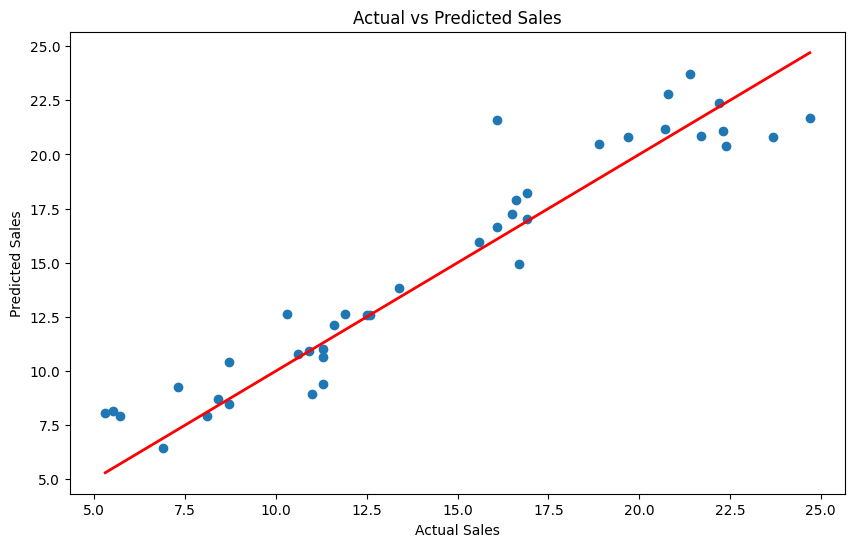

In [30]:
# Scatter plot of actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [31]:
# Example of making a prediction
new_data = pd.DataFrame({'TV': [200], 'Radio': [40], 'Newspaper': [15]})
prediction = model.predict(new_data)
print(f'Predicted Sales: {prediction[0]}')

Predicted Sales: 19.718844767706827
